# Chuẩn bị dữ liệu

In [1]:
import matplotlib.pyplot as plt

In [2]:
!pip install gdown
import gdown

file_name = 'final.csv'
url = f'https://drive.google.com/uc?id=1XE9W838KPLyGXDA7aZxGCdfmfYdY8L6J'

# Download the file
gdown.download(url,file_name, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1XE9W838KPLyGXDA7aZxGCdfmfYdY8L6J
To: /content/final.csv
100%|██████████| 817k/817k [00:00<00:00, 94.5MB/s]


'final.csv'

In [3]:
import pandas as pd

data = pd.read_csv(file_name)
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mssv          3417 non-null   object 
 1   Label         3417 non-null   object 
 2   namsinh       3417 non-null   float64
 3   gioitinh      3417 non-null   float64
 4   noisinh       3417 non-null   object 
 5   lopsh         3417 non-null   object 
 6   khoa          3417 non-null   object 
 7   hedt          3417 non-null   object 
 8   khoahoc       3417 non-null   float64
 9   chuyennganh   3417 non-null   object 
 10  dien_tt       3417 non-null   object 
 11  lop12_matinh  3417 non-null   float64
 12  truong_thpt   3417 non-null   object 
 13  xlhv_1        3417 non-null   float64
 14  xlhv_2        3417 non-null   float64
 15  xlhv_3        3417 non-null   float64
 16  xlhv_4        3417 non-null   float64
 17  xlhv_5        3417 non-null   float64
 18  xlhv_6        3417 non-null 

# Tạo hàm vẽ biểu đồ

Dưới đây là danh sách các feature sẽ được dùng để vẽ biểu đồ

In [4]:
features = ['namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', \
            'khoa hoc', 'chuyennganh', 'dien_tt', 'lop12_matinh', \
            'truong_thpt', 'xlhv_1', 'xlhv_2', 'xlhv_3', 'xlhv_4', \
            'xlhv_5', 'xlhv_6', 'drl_1', 'drl_2', 'drl_3', 'drl_4', \
            'drl_5', 'drl_6', 'dtbhk_1', 'dtbhk_2', 'dtbhk_3', 'dtbhk_4', \
            'dtbhk_5', 'dtbhk_6', 'sotchk_1', 'sotchk_2', 'sotchk_3', \
            'sotchk_4', 'sotchk_5', 'sotchk_6']

Tạo hàm vẽ biểu đồ tròn nhận các giá trị đầu vào chính như sau:
  1. Danh sách các cột / thuộc tính sẽ được vẽ biểu đồ (x)
  2. Số lượng giá trị sẽ được hiển thị trong biểu đồ (n) (mặc định là None lấy tất cả)
  3. Danh sách nhãn hiển thị dùng để thay thế nhãn trong dữ liệu (label_replacements)
  4. Dataframe sẽ được sử dụng (df)
Ngoài ra còn có thêm giá trị đầu vào phụ là y chỉ dùng để chú thích cho title của biểu đồ

Hàm sẽ được sử dụng cho các trường hợp sau:
  1. Trường hợp hiển thị tất cả các giá trị (n=None): Trường hợp này sẽ vẽ biểu đồ cho toàn bộ các giá trị trong một/nhiều cột mà không phải lọc. Mục đích của biểu đồ này là phân tích tổng quan
  2. Trường hợp hiển thị top n giá trị phổ biến nhất (n>0): Trường hợp này sẽ vẽ biểu đồ cho n giá trị xuất hiện nhiều nhất trong cột. Mục đích của biểu đồ này là tìm hiểu các giá trị có tần suất cao nhất trong biểu đồ nhằm tìm xu hướng của dữ liệu
  3. Trường hợp hiển thị top n giá trị ít phổ biến nhất (n<0): Trường hợp này sẽ vẽ biểu đồ cho n giá trị xuất hiện ít nhất trong cột. Mục  đích của biểu đồ này là tìm hiểu về các giá trị hiếm, ngoại lai nhằm tìm ra những thông tin hữu ích

Hàm sẽ được sử dụng trong các yêu cầu về thể hiện phần trăm hoặc khi có ít giá trị trong cột

In [5]:
# Hàm vẽ phần trăm (biểu đồ tròn))
def visual_pie_chart(x, y, n=None, label_replacements=None, df=df):
  for feature in x:
    count = df[feature].value_counts()

    # Lấy bao nhiêu value
    if n is None: # Lấy hết
      top_n = count
    elif n > 0: # Top n ghi nhận nhiều nhất
      top_n = count.nlargest(n)
    else: # Top n ghi nhận ít nhất
      top_n = count.nsmallest(-n)

    percent = (top_n / top_n.sum()) * 100

    # Thay thế nhãn nếu cần
    if label_replacements:
      new_labels = []
      for label in percent.index:
        new_label = label_replacements.get(label, label)
        new_labels.append(new_label)
      percent.index = new_labels

    # Vẽ biểu đồ tròn
    plt.figure(figsize=(8, 6))
    plt.pie(percent, autopct='%1.1f', startangle=90)
    plt.legend(labels=percent.index, title=y, loc='best')

    # Thêm chú thích
    if n is None:
      plt.title(f'Tỉ lệ phân bổ {y}')
    elif n > 0:
      plt.title(f'Top {n} tỉ lệ phân bổ {y} có nhiều giá trị nhất')
    else:
      plt.title(f'Top {-n} tỉ lệ phân bổ {y} có ít giá trị nhất')

    plt.axis('equal')
    plt.show()

Tạo hàm vẽ biểu đồ cột. Hàm nhận các giá trị đầu vào chính như sau:
  1. Danh sách các cột / thuộc tính sẽ được vẽ biểu đồ
  2. Số lượng giá trị sẽ được thể hiện trong biểu đồ (mặc định là 10)
  3. Danh sách nhãn hiển thị dùng để thay thế các nhãn trong dữ liệu (label_replacements)
Ngoài ra hàm còn có thêm 2 giá trị đầu vào phụ là y và angle lần lượt phụ giúp trong việc thể hiện chú thích cho tên biểu đồ và tạo góc nghiêng cho các giá trị cột x nhằm thuận tiện xem

Hàm sẽ được sử dụng trong các trường hợp sau:
  1. Trường hợp hiển thị top n giá trị phổ biến nhất (n>0): Trường hợp này sẽ vẽ biểu đồ cho n giá trị xuất hiện nhiều nhất
  2. Trường hợp hiển thị top n giá trị ít phổ biến nhất (n<0): Trường hợp này sẽ vẽ biểu đồ cho n giá trị ít xuất hiện nhất

Hàm sẽ được sử dụng trong các yêu cầu về thể hiện số lượng hoặc khi có quá nhiều giá trị trong cột

In [6]:
# Hàm vẽ biểu thị số lượng (biểu đồ cột)
def visual_bar_chart(x, y, angle=45, n=10, label_replacements=None):
  for feature in x:
    if n > 0:
      count = df[feature].value_counts().nlargest(n) # Top n ghi nhận nhiều nhất
    else:
      count = df[feature].value_counts().nsmallest(-n) # Top n ghi nhận ít nhất

    # Thay thế nhãn nếu cần
    if label_replacements:
      new_labels = []
      for label in count.index:
        new_label = label_replacements.get(label, label)
        new_labels.append(new_label)
      count.index = new_labels

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    count.plot(kind='bar')

    if n > 0:
      plt.title(f'Top {abs(n)} {y} của sinh viên được ghi nhận nhiều nhất')
    else:
      plt.title(f'Top {abs(n)} {y} của sinh viên được ghi nhận ít nhất')
    plt.xlabel(y)
    plt.ylabel('Số lần ghi nhận')

    plt.xticks(rotation=angle)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ

## Năm sinh

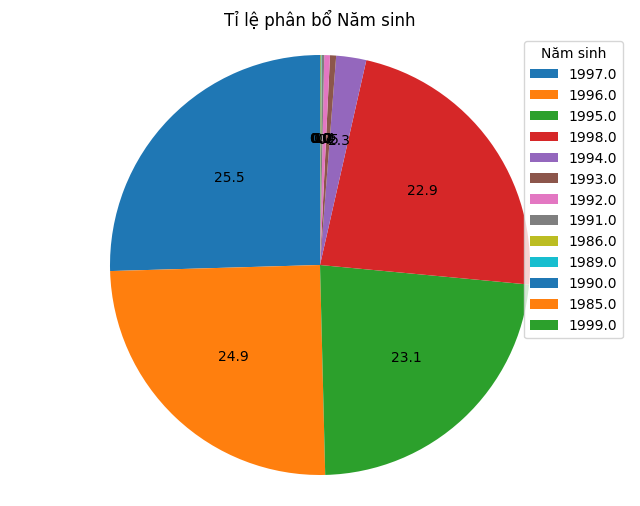

In [7]:
visual_pie_chart(['namsinh'], 'Năm sinh')

Đa số là sinh viên từ 1995-1998

## Giới tính

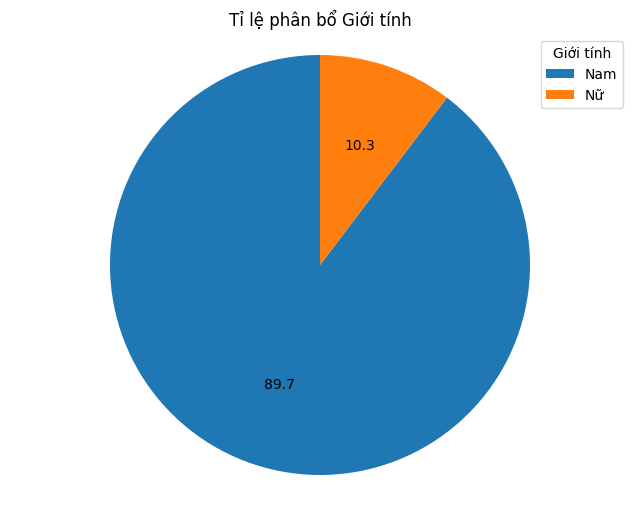

In [8]:
# Thay thế nhãn 0/1 tương đương với giới tính nữ/nam
label_replacements = {
    0: 'Nữ',
    1: 'Nam'
}
visual_pie_chart(['gioitinh'], 'Giới tính', label_replacements=label_replacements)

Qua biểu đồ ta thấy tỉ lệ nam sinh ghi nhận khá lớn (89,7%), tỉ lệ nữ sinh khá thấp chưa đến 15%

## Nơi sinh
Về nơi sinh, không thể nào vẽ biểu đồ tròn (do có rất nhiều tỉnh thành, biểu đồ tròn sẽ khó thể hiện) nên ta thực hiện vẽ biểu đồ cột về các top n xuất hiện nhiều nhất và ít nhất

Trong biểu đồ vẽ top 10 nơi sinh ghi nhận nhiều nhất, dự đoán rằng các tỉnh thành xuất hiện sẽ là các tỉnh thành trong nam (các tỉnh thuộc Nam Bộ, Nam Trung Bộ). Nếu như dự đoán đúng, có thể sẽ thấy được sinh viên có xu hướng chọn trường gần với nơi sinh của mình

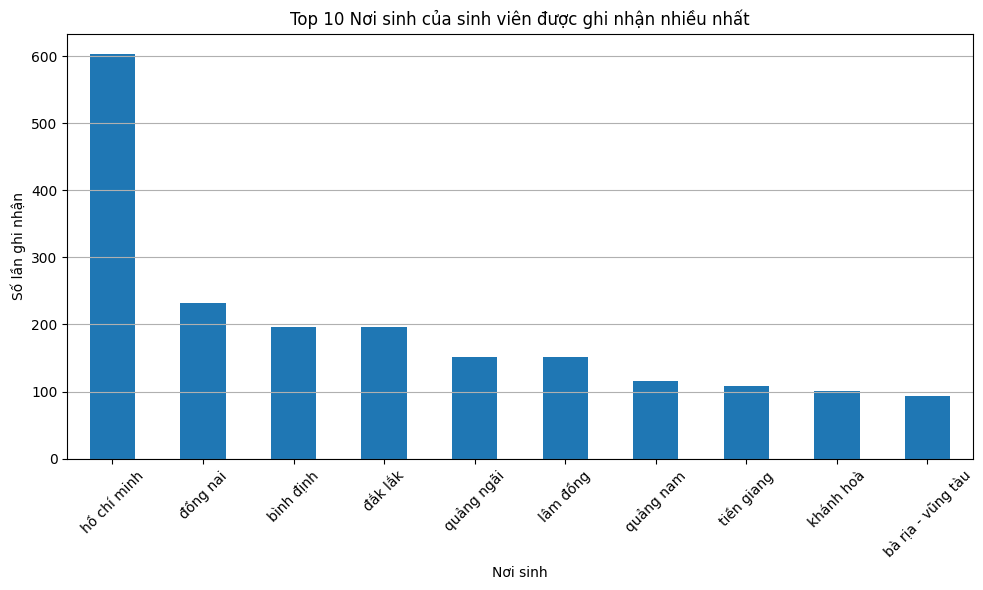

In [9]:
# 10 địa phương nhiều sinh viên nhất
visual_bar_chart(['noisinh'], 'Nơi sinh')

Thành phố Hồ Chí Minh có số lượng ghi nhận khá lớn, có thể do số dân ở thành phố đông và trường nằm ở trong thành phố,; các tỉnh, thành phố còn lại đều là ở miền Trung hoặc miền Nam

Trong biểu đồ top 10 nơi sinh ít sinh viên nhất, dự đoán ngược lại so với biểu đồ trên.

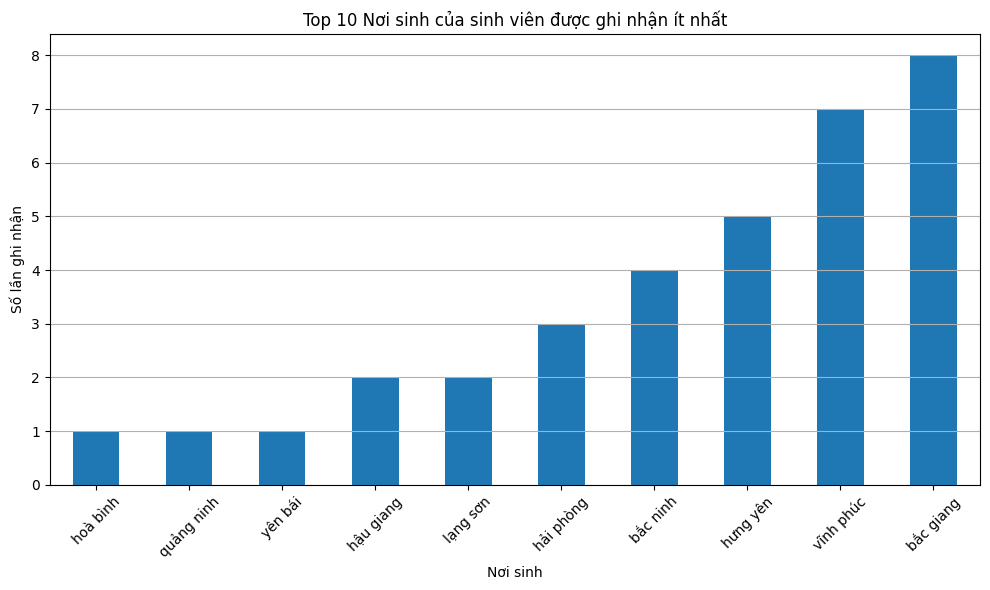

In [10]:
# 10 địa phương ít sinh viên nhất
visual_bar_chart(['noisinh'], 'Nơi sinh', n=-10)

Tất cả đều là các tỉnh phía Bắc Việt Nam với số lượng sinh viên ghi nhận chưa tới 10 sinh viên/tỉnh

## Lớp sinh hoạt
Có rất nhiều lớp sinh hoạt, không thể vẽ biểu đồ tròn, thực hiện vẽ biểu đồ cột về top n xuất hiện nhiều nhất/ ít nhất

Trong top n nhiều nhất, ta hy vọng các lớp có đuôi 0001 sẽ ở trên top đầu. Do các lớp này sẽ tăng sĩ số theo các năm (sinh viên bị chuyển vào các lớp này do tốt nghiệp trễ)

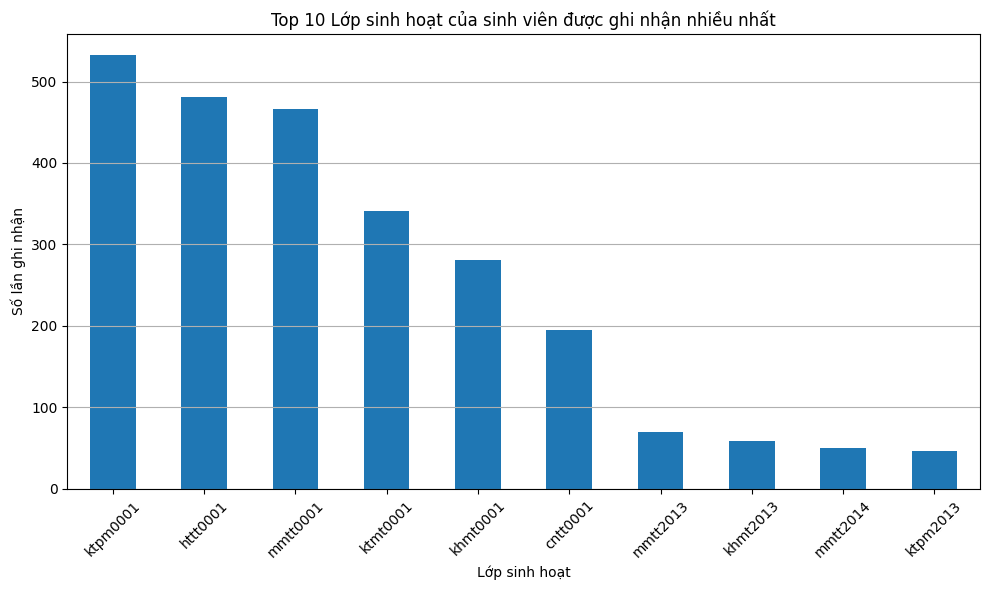

In [11]:
# Top 10 lớp sinh hoạt nhiều sinh viên nhất
visual_bar_chart(['lopsh'], 'Lớp sinh hoạt')

Các lớp có số 0001 đều có rất đông sinh viên, ít nhất là cntt0001 với sĩ số gần 200 sinh viên, còn lại các lớp khác có sĩ số chưa tới 100 sinh viên

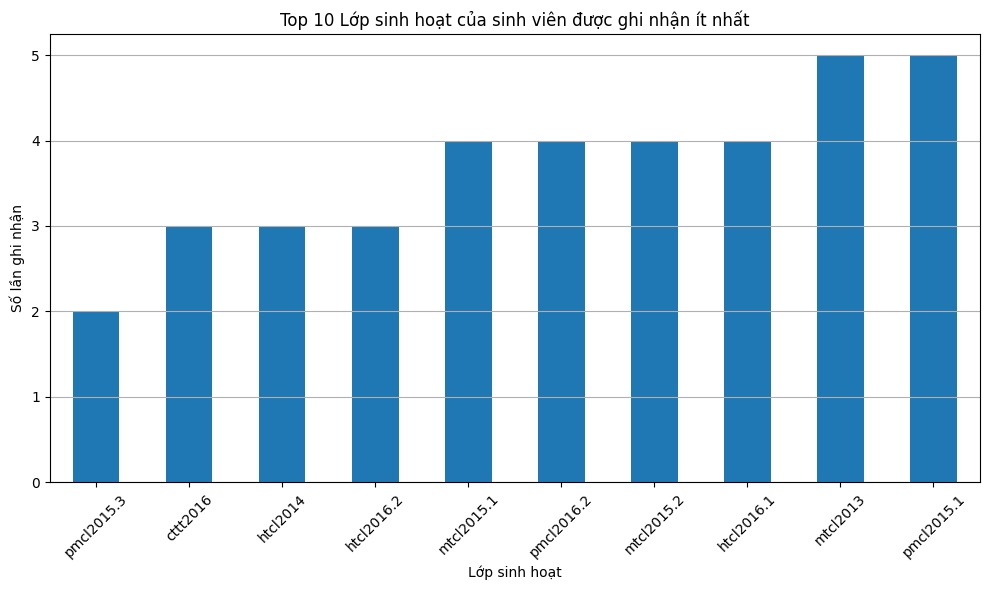

In [12]:
# Top 10 lớp sinh hoạt ít sinh viên nhất
visual_bar_chart(['lopsh'], 'Lớp sinh hoạt', n=-10)

Tất cả đều là các lớp chất lượng cao hoặc chương trình tiên tiến với sĩ số mỗi lớp không quá 5 sinh viên, đa số là các khóa năm 2015 và 2016

## Khoa

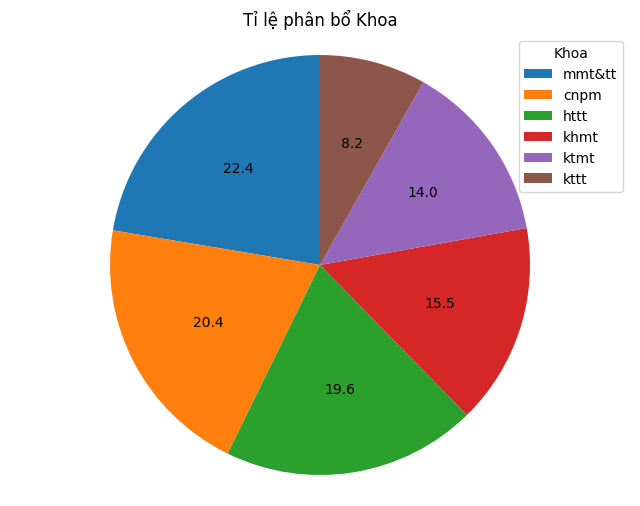

In [13]:
visual_pie_chart(['khoa'], 'Khoa')

Sinh viên các khoa phân bố không đồng đều, MMT&TT với CNPM là 2 khoa có số lượng sinh viên đông nhất (>20%), 2 khoa có số lượng sinh viên thấp nhất là KHMT và KH&KTTT

## Hệ đào tạo

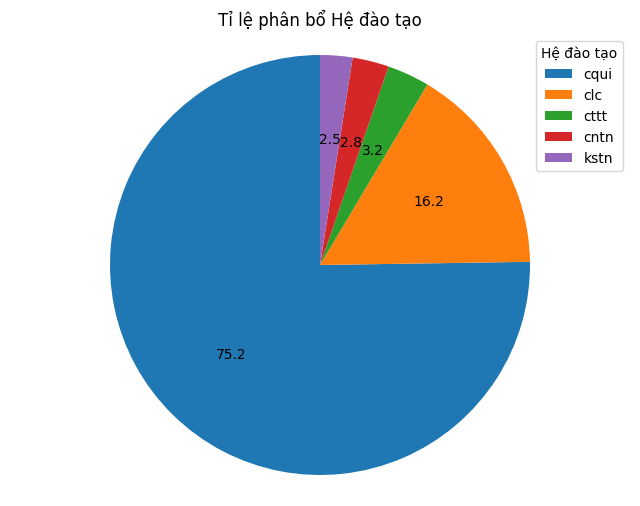

In [14]:
visual_pie_chart(['hedt'], 'Hệ đào tạo')

Hệ đào tạo chính quy chiếm 3/4 số lượng ghi nhận (75,2%), kế tiếp là chất lượng cao với hơn 15% số lượng ghi nhận, còn lại tổng chưa đến 10%

## Khóa đào tạo

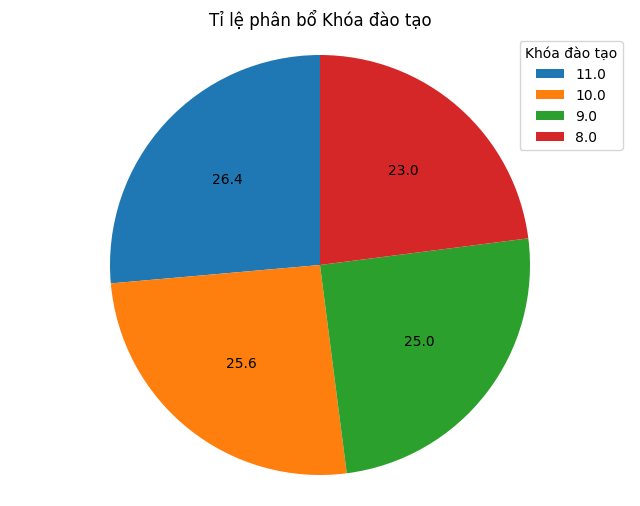

In [15]:
visual_pie_chart(['khoahoc'], 'Khóa đào tạo')

Các khóa chiếm tỉ lệ gần đồng đều, nhiều nhất là khóa 11

## Chuyên ngành

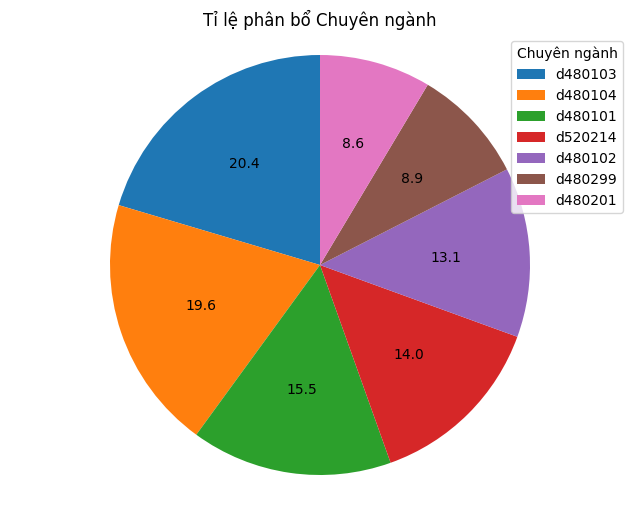

In [16]:
visual_pie_chart(['chuyennganh'], 'Chuyên ngành')

d480103 và d480104 chiếm tỉ lệ nhiều nhất, ít nhất là d480201 và d480299

## Diện trúng tuyển

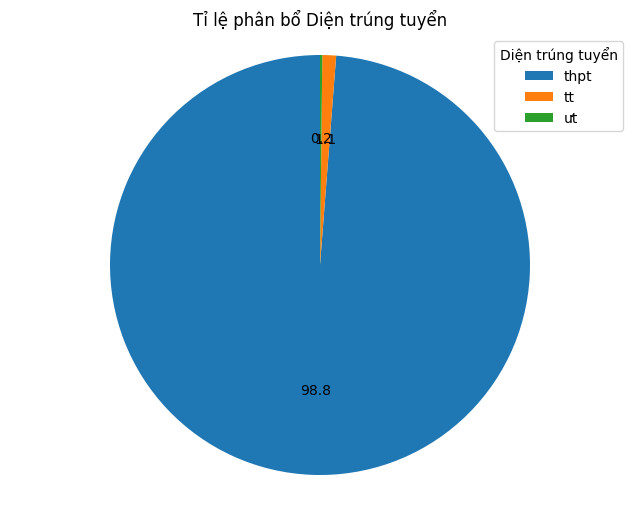

In [17]:
visual_pie_chart(['dien_tt'], 'Diện trúng tuyển')

Gần như tất cả các sinh viên đều thông qua phương thức xét tuyển trung học phổ thông, chỉ có một số rất ít là tuyển thẳng và ưu tiên

## Trường cấp 3

### Mã tỉnh

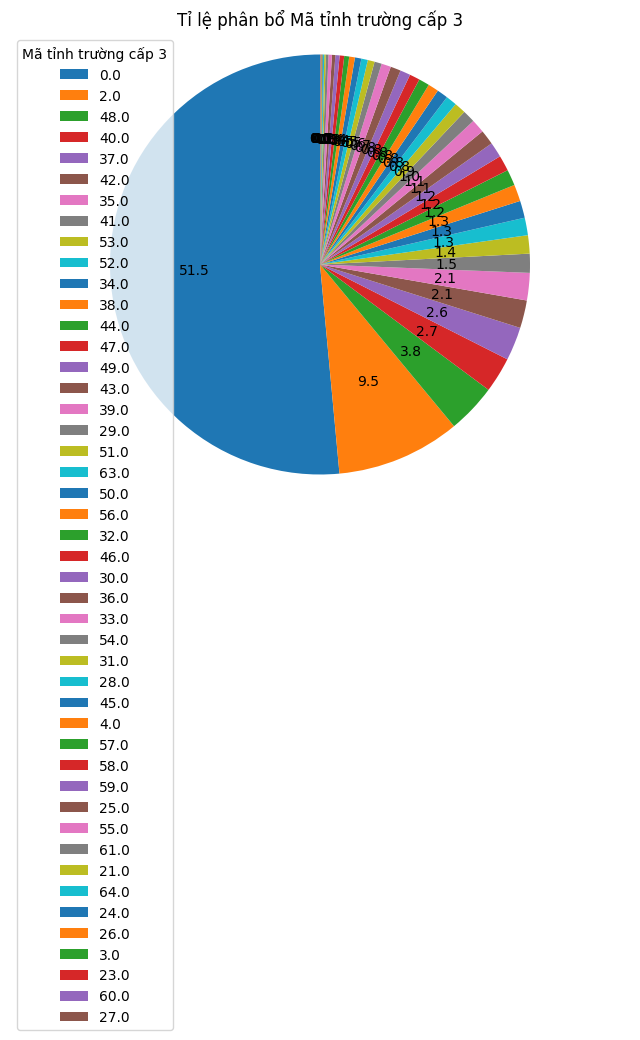

In [18]:
visual_pie_chart(['lop12_matinh'], 'Mã tỉnh trường cấp 3')

Hơn 50% dữ liệu là dữ liệu trống (0)

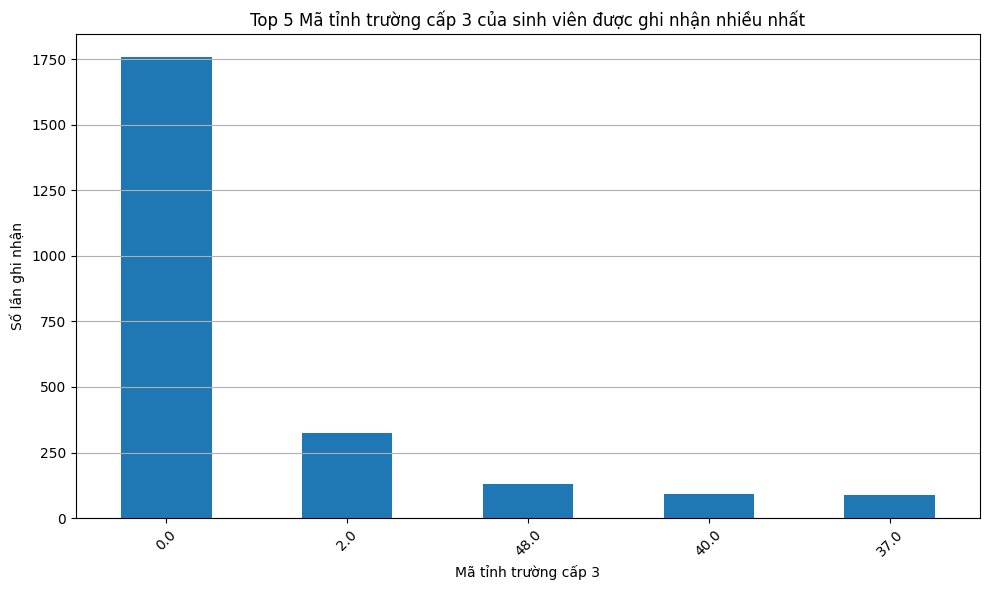

In [19]:
# Top 5 mã tỉnh có số sinh viên đậu nhiều nhất
visual_bar_chart(['lop12_matinh'], 'Mã tỉnh trường cấp 3', n=5)

Tp.HCM khá nhiều với hơn 250 sinh viên, sau đó là Đồng Nai, Đắk Lắk và Bình Định

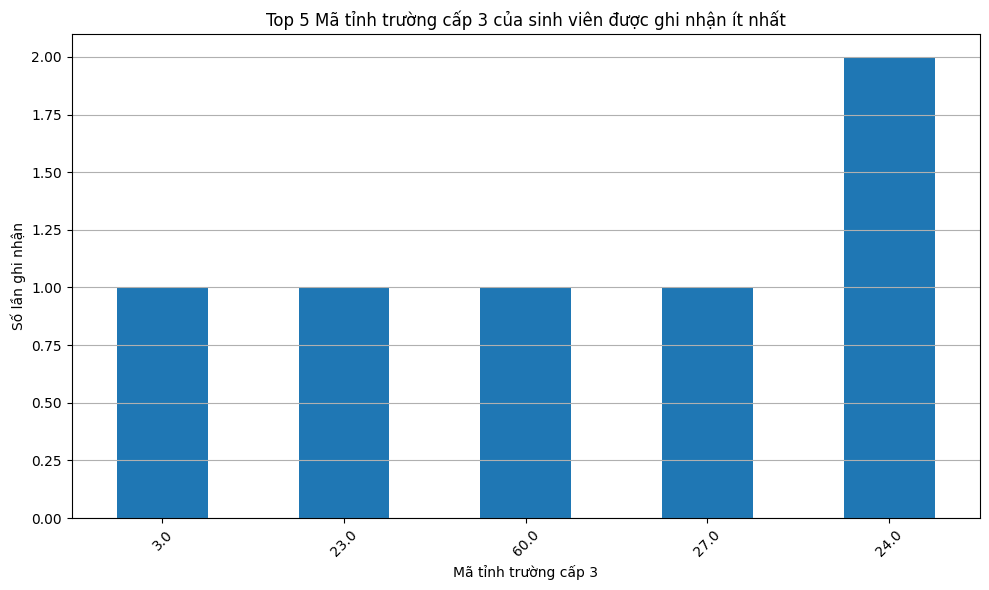

In [20]:
# Top 5 mã tỉnh có số sinh viên đậu ít nhất
visual_bar_chart(['lop12_matinh'], 'Mã tỉnh trường cấp 3', n=-5)

Hải Phòng, Hòa Bình, Bạc Liêu, Ninh Bình đều chỉ có 1 sinh viên, riêng Hà Nam có 2 sinh viên

### Loại trường

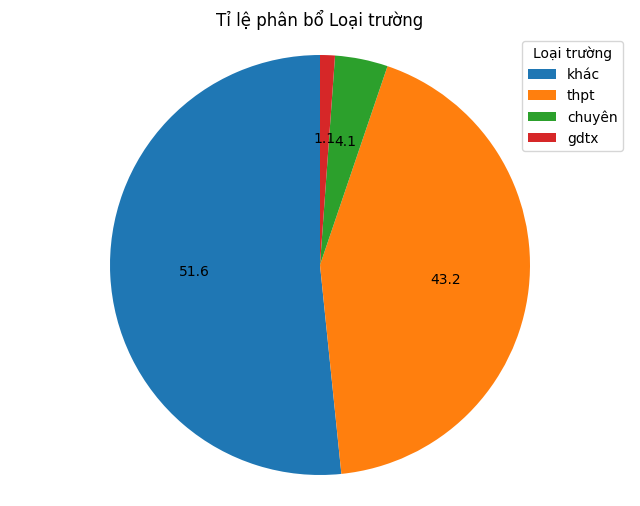

In [21]:
visual_pie_chart(['truong_thpt'], 'Loại trường')

Hơn một nửa là khác, còn lại đa số là trường thpt, có 4,1% chuyên và 1,1% là giáo dục thường xuyên

## Điểm rèn luyện

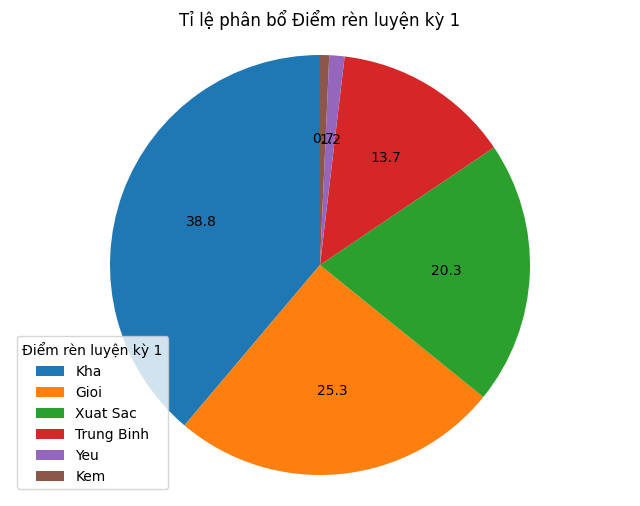

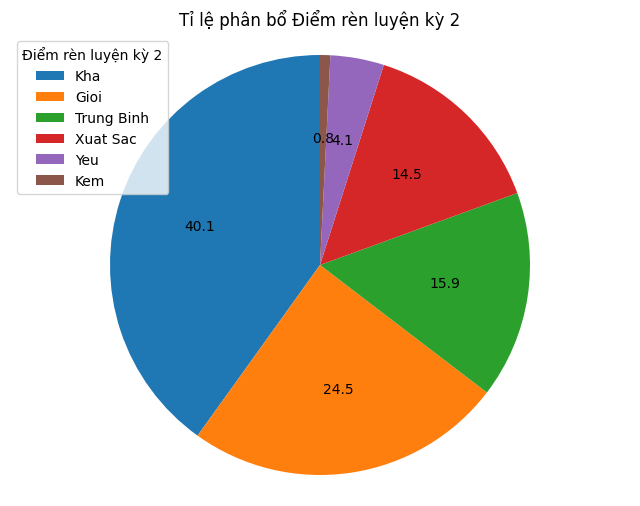

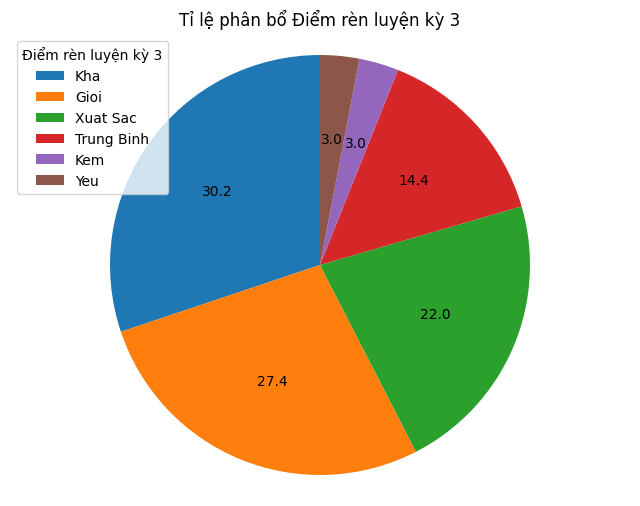

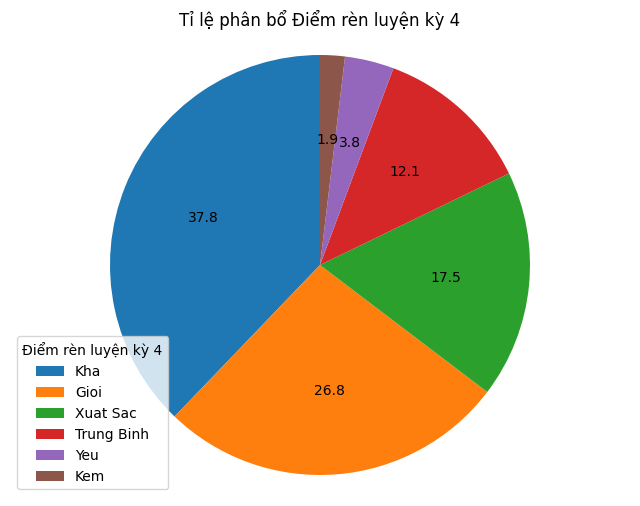

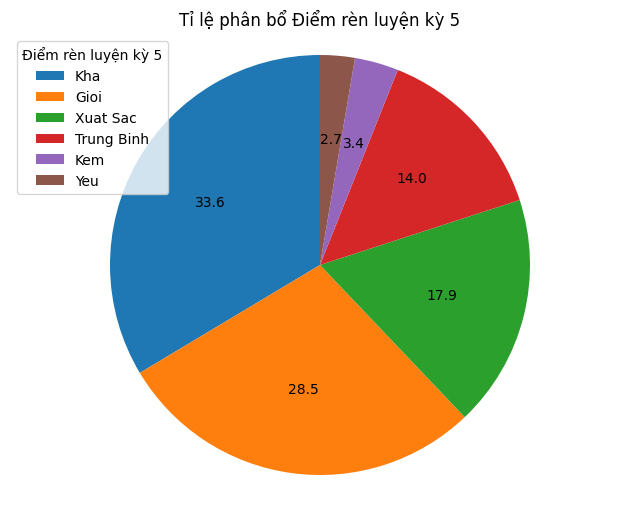

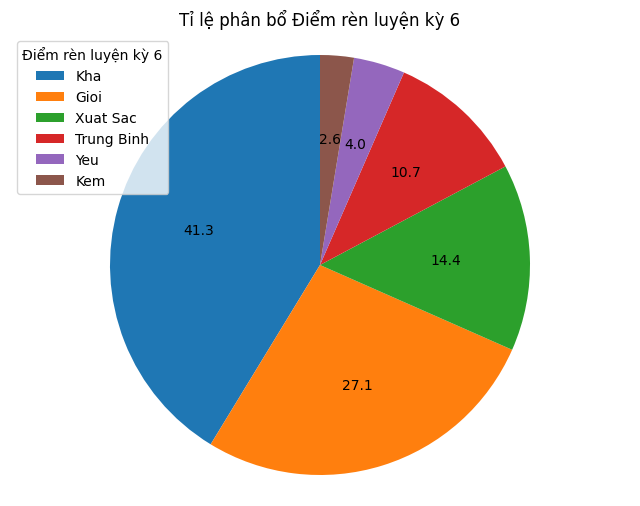

In [22]:
# Thay thế nhãn trong dữ liệu
label_replacements = {
    1: 'Xuất sắc',
    2: 'Giỏi',
    3: 'Khá',
    4: 'Trung bình',
    5: 'Yếu',
    6: 'Kém'
}
# Vẽ cả 6 cột, mỗi cột một biểu đồ
drl_col = ['drl_1', 'drl_2', 'drl_3', 'drl_4', 'drl_5', 'drl_6']
for index, drl in enumerate(drl_col):
  visual_pie_chart([drl], f'Điểm rèn luyện kỳ {index+1}', label_replacements=label_replacements)

Ở tất cả các kỳ điểm rèn luyện ở mức khá chiếm nhiều nhất, sau đó là giỏi, xuất sắc và trung bình; yếu và kém chiếm tỉ lệ rất nhỏ

## Xử lý học vụ

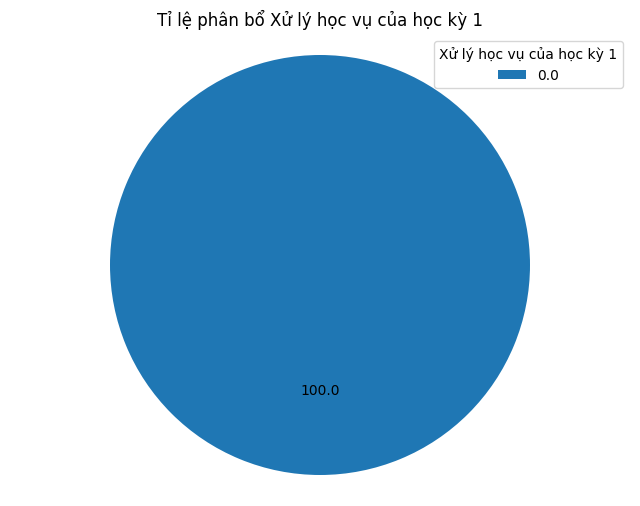

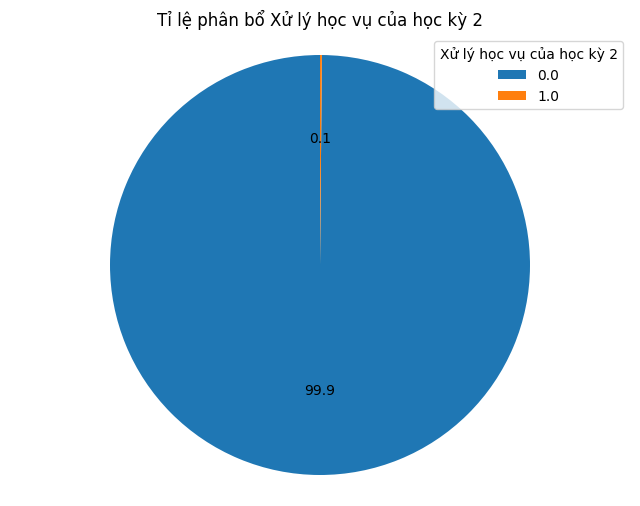

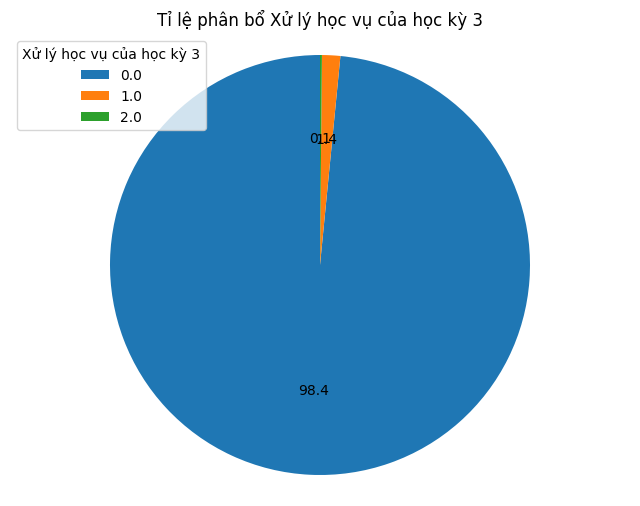

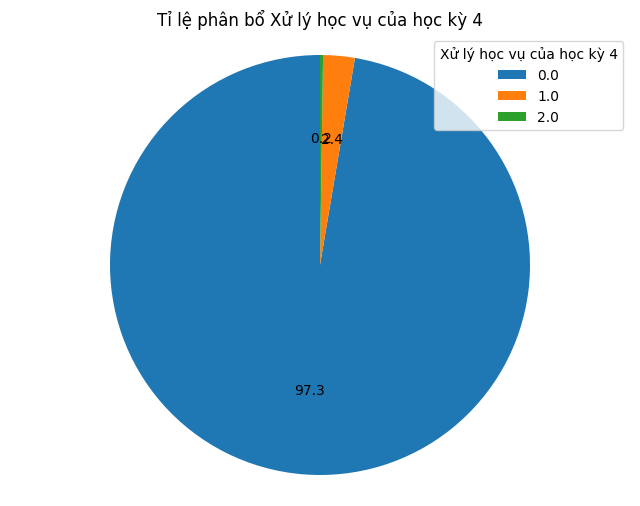

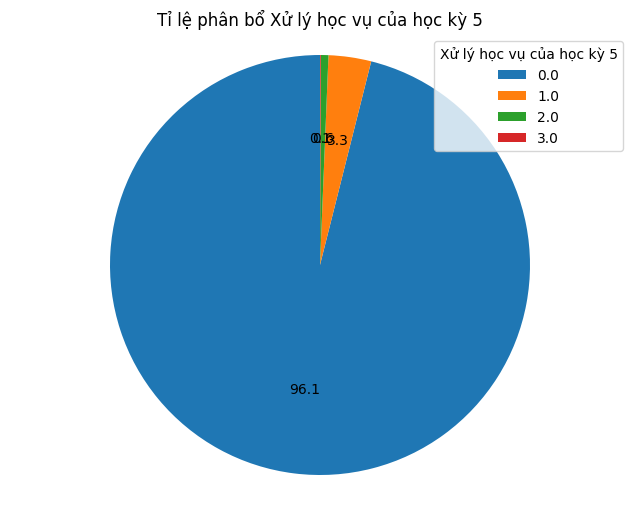

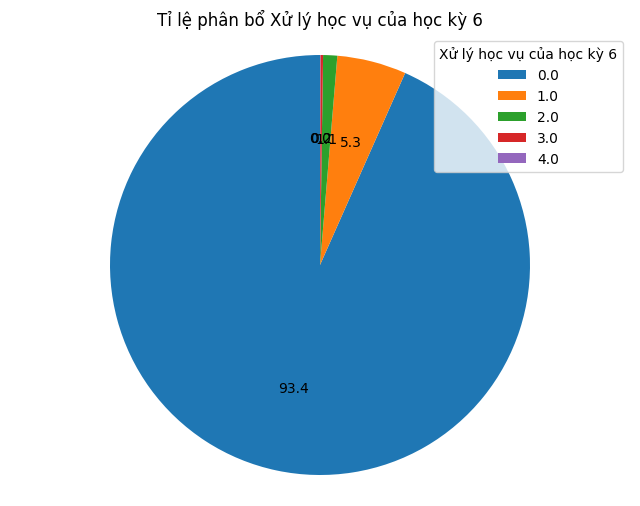

In [23]:
xlhv_col = ['xlhv_1', 'xlhv_2', 'xlhv_3', 'xlhv_4', 'xlhv_5', 'xlhv_6']
for index, xlhv in enumerate(xlhv_col):
  visual_pie_chart([xlhv], f"Xử lý học vụ của học kỳ {index+1}")

Hơn 90% sinh viên không bị cảnh cáo sau 6 học kỳ, có khoảng 5% bị cảnh cáo 1 lần và một số ít bị cảnh cáo nhiều hơn 1 lần

## Điểm trung bình học kỳ

In [24]:
# Tách các cột điểm trung bình ra để xử lý
sub_df = df[['dtbhk_1', 'dtbhk_2', 'dtbhk_3', 'dtbhk_4', 'dtbhk_5', 'dtbhk_6']]
dtb_df = sub_df.copy() # Copy để tránh ảnh hưởng df gốc

# Định nghĩa các khoảng và nhãn
bins = [0, 5, 6, 7, 8, 9, 10]
labels = [0, 1, 2, 3, 4, 5]

# Chia điểm theo khoảng
for col in dtb_df.columns:
    dtb_df.loc[:, col + '_bin'] = pd.cut(dtb_df[col], bins=bins, labels=labels, right=False)

# Hiển thị DataFrame với các cột đã chia theo khoảng
dtb_df.head()

,dtbhk_1,dtbhk_2,dtbhk_3,dtbhk_4,dtbhk_5,dtbhk_6,dtbhk_1_bin,dtbhk_2_bin,dtbhk_3_bin,dtbhk_4_bin,dtbhk_5_bin,dtbhk_6_bin
0,6.02,7.03,6.40,7.01,6.35,6.77,2,3,2,3,2,2
1,7.29,8.22,8.28,8.07,8.85,7.84,3,4,4,4,4,3
2,5.55,4.45,6.30,2.83,3.61,1.11,1,0,2,0,0,0
3,6.87,7.27,6.40,5.81,6.80,6.72,2,3,2,1,2,2
4,6.73,6.52,7.35,6.70,8.07,8.22,2,2,3,2,4,4


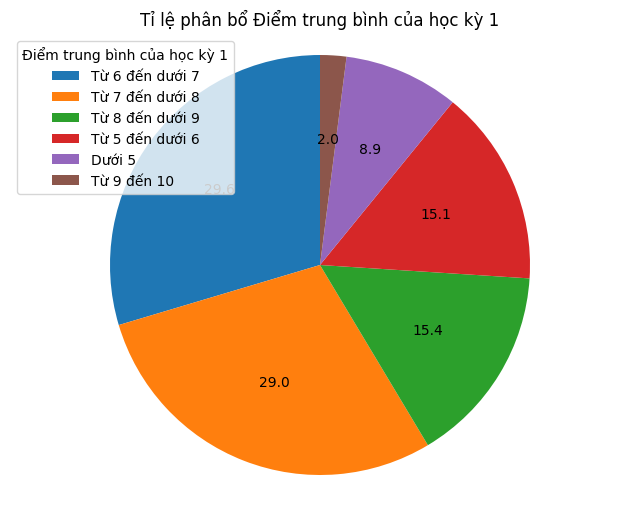

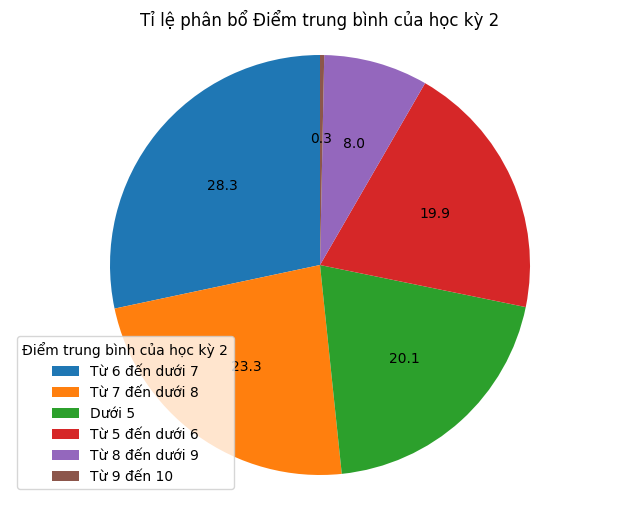

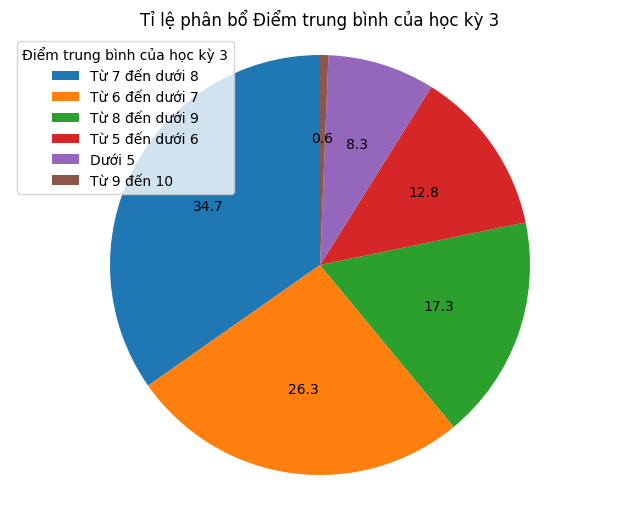

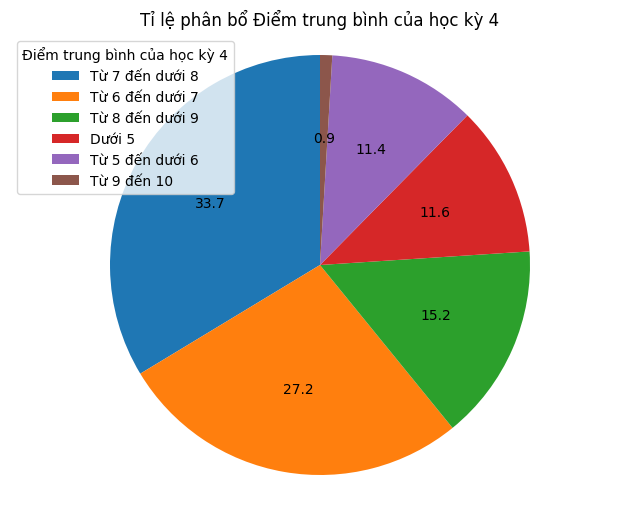

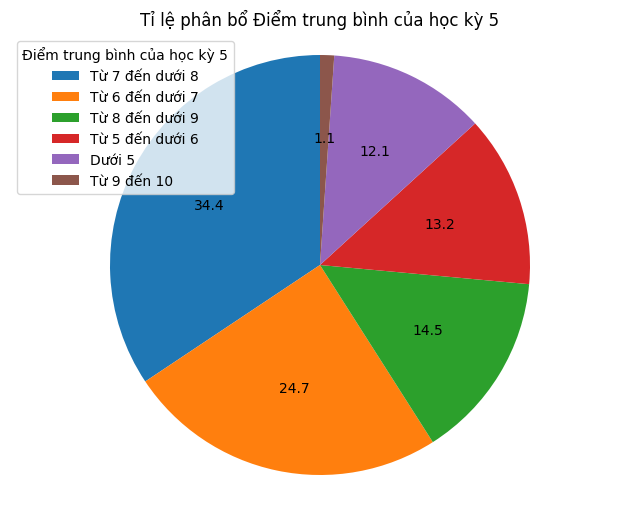

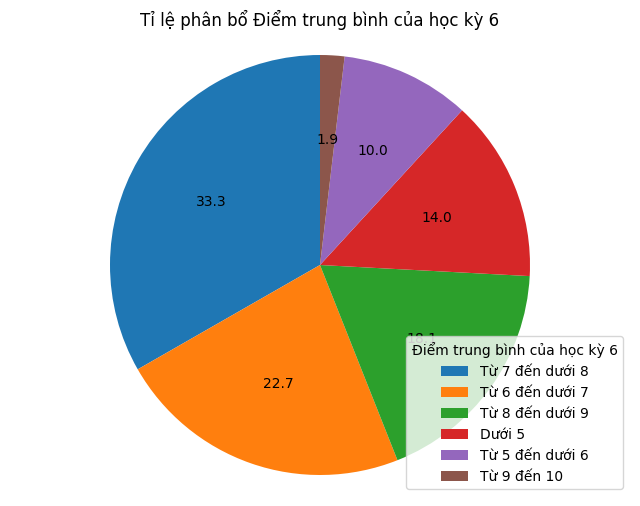

In [25]:
# Thay thế nhãn
label_replacements = {
    0: "Dưới 5",
    1: "Từ 5 đến dưới 6",
    2: "Từ 6 đến dưới 7",
    3: "Từ 7 đến dưới 8",
    4: "Từ 8 đến dưới 9",
    5: "Từ 9 đến 10"
}

# Vẽ biểu đồ (mỗi cột một biểu đồ)
dtb_cols = ['dtbhk_1_bin', 'dtbhk_2_bin', 'dtbhk_3_bin', 'dtbhk_4_bin', 'dtbhk_5_bin', 'dtbhk_6_bin']

for index, dtb in enumerate(dtb_cols):
  visual_pie_chart([dtb], f'Điểm trung bình của học kỳ {index+1}', label_replacements=label_replacements, df=dtb_df)

Đa số ghi nhận số điểm từ 6-8

## Số tín chỉ học kỳ

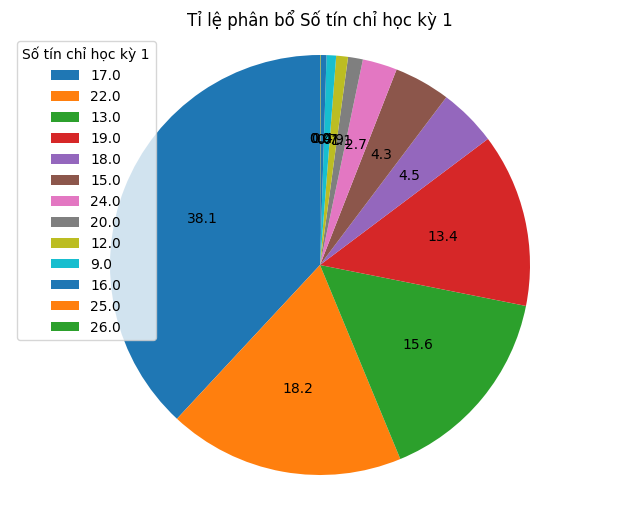

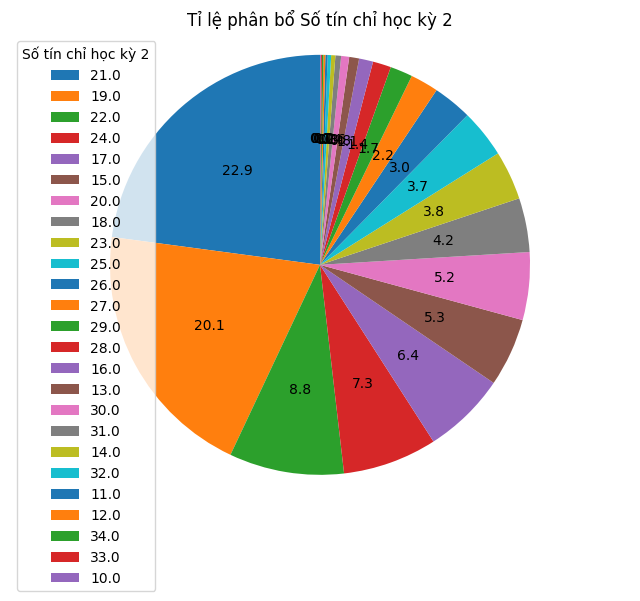

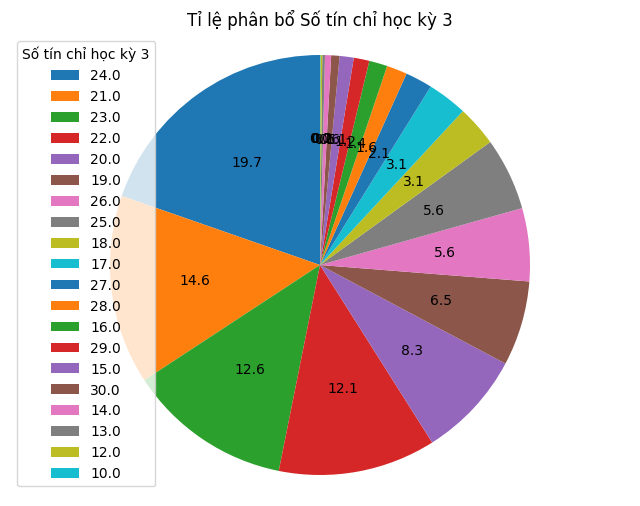

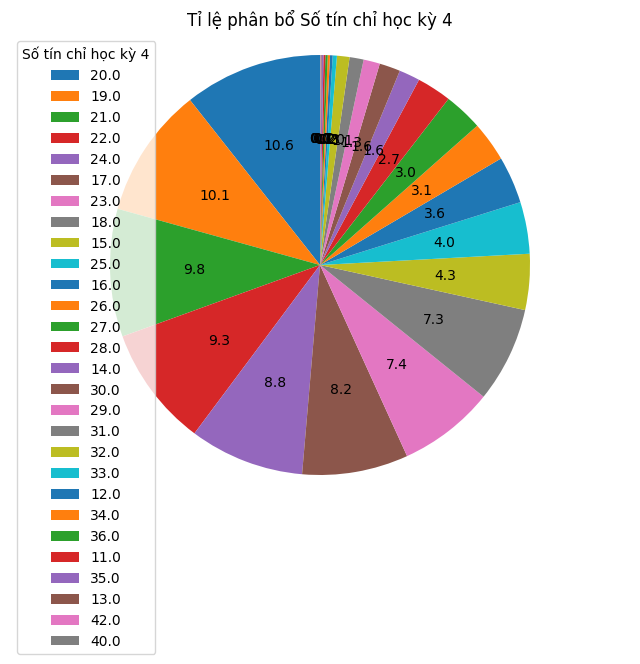

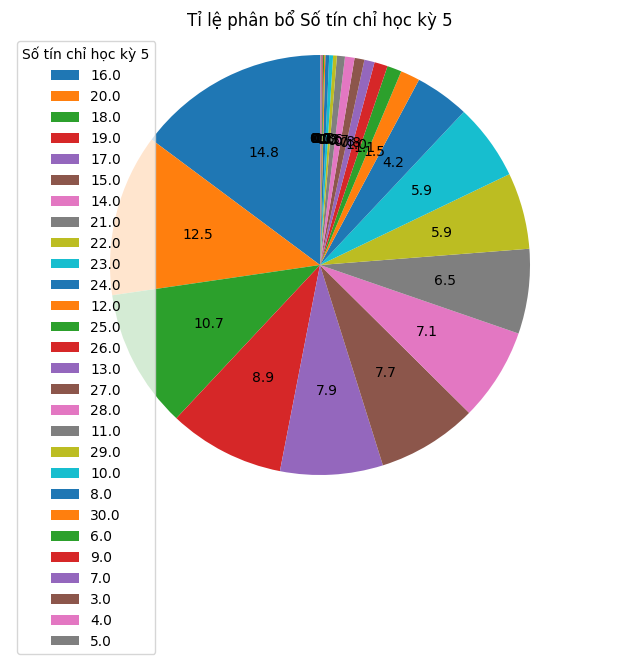

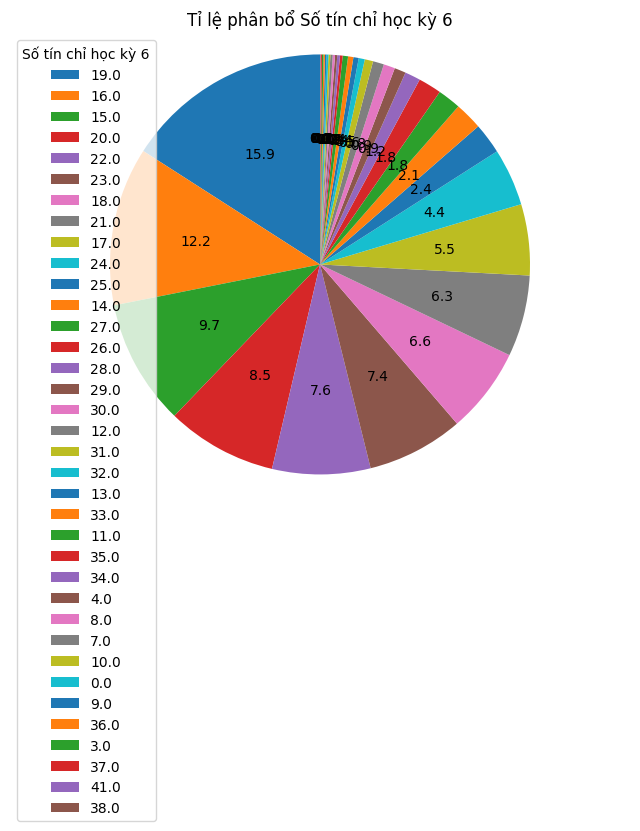

In [26]:
# Vẽ biểu đồ (mỗi cột một biểu đồ)
sotchk_cols = ['sotchk_1', 'sotchk_2', 'sotchk_3', 'sotchk_4', 'sotchk_5', 'sotchk_6']
for index, tchk in enumerate(sotchk_cols):
  visual_pie_chart([tchk], f'Số tín chỉ học kỳ {index+1}')

Đa số các sinh viên đăng kí 15-25 tín chỉ mỗi học kỳ